In [24]:
import yfinance as yf

In [25]:
df = yf.download('DIVO11.SA')
print(df.head())
print(df.describe())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker      DIVO11.SA  DIVO11.SA  DIVO11.SA  DIVO11.SA DIVO11.SA
Date                                                            
2012-01-31  30.700001  30.860001  30.700001  30.860001       310
2012-02-01  31.230000  31.230000  31.120001  31.120001      1040
2012-02-02  31.250000  31.299999  31.230000  31.299999      2610
2012-02-03  31.540001  31.600000  31.400000  31.400000        70
2012-02-06  31.350000  31.480000  31.350000  31.480000       250
Price         Close         High          Low         Open        Volume
Ticker    DIVO11.SA    DIVO11.SA    DIVO11.SA    DIVO11.SA     DIVO11.SA
count   3412.000000  3412.000000  3412.000000  3412.000000  3.412000e+03
mean      54.035961    54.511747    53.622122    54.078479  4.270263e+04
std       23.890590    24.014691    23.774599    23.887460  1.346812e+05
min       17.290001    17.309999    16.990000    17.209999  1.000000e+01
25%       33.540001    33.810001    33.277

In [27]:
import pandas as pd
conso_x = pd.DataFrame()

list = ['BRL=X', '^GSPC', 'VWOB', 'GD=F', 'BTC-USD', '^FVX', '^TNX', 'BOVA11.SA']

dfs = []

for t in list:
    ind = yf.download(t, start='2013-01-01')[['Close', 'Volume']]
    ind.columns = [f'{col}_{t}' for col in ind.columns]
    dfs.append(ind)

conso_x = pd.concat(dfs, axis=1)

print(conso_x.describe())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

       ('Close', 'BRL=X')_BRL=X  ('Volume', 'BRL=X')_BRL=X  \
count               3365.000000                     3365.0   
mean                   4.129068                        0.0   
std                    1.187237                        0.0   
min                    1.941900                        0.0   
25%                    3.194700                        0.0   
50%                    4.023600                        0.0   
75%                    5.239800                        0.0   
max                    6.300000                        0.0   

       ('Close', '^GSPC')_^GSPC  ('Volume', '^GSPC')_^GSPC  \
count               3251.000000               3.251000e+03   
mean                3312.487274               3.987925e+09   
std                 1366.561959               9.916747e+08   
min                 1457.150024               0.000000e+00   
25%                 2100.369995               3.369000e+09   
50%                 2883.979980               3.785080e+09   
75%    

In [28]:
conso_x.columns = [
    'usdbrl', 'usdbrl_vol',
    'sp500', 'sp500_vol',
    'vwob', 'vwob_vol',
    'gold', 'gold_vol',
    'btcusd', 'btcusd_vol',
    'tbill5', 'tbill5_vol',
    'tbond10', 'tbond10_vol',
    'ibov', 'ibov_vol',
]

In [29]:
data = pd.concat([conso_x, df], axis=1)

In [30]:
data.drop(columns=[
    ('Low', 'DIVO11.SA'),
    ('High', 'DIVO11.SA'),
    ('Open', 'DIVO11.SA')
], inplace=True)

In [32]:
data.columns = [
    'usdbrl', 'usdbrl_vol',
    'sp500', 'sp500_vol',
    'vwob', 'vwob_vol',
    'gold', 'gold_vol',
    'btcusd', 'btcusd_vol',
    'tbill5', 'tbill5_vol',
    'tbond10', 'tbond10_vol',
    'divo11', 'divo11_vol',
    'ibov', 'ibov_vol',
]

In [33]:
data.drop(columns=['tbond10_vol', 'tbill5_vol', 'usdbrl_vol'
], inplace=True)
data.describe()

,usdbrl,sp500,sp500_vol,vwob,vwob_vol,gold,gold_vol,btcusd,btcusd_vol,tbill5,tbond10,divo11,divo11_vol,ibov,ibov_vol
count,3365.000000,3251.000000,3.251000e+03,3147.000000,3.147000e+03,3243.000000,3243.000000,4097.000000,4.097000e+03,3251.000000,3251.000000,3190.000000,3.190000e+03,3412.000000,3.412000e+03
mean,4.129068,3312.487274,3.987925e+09,53.475678,2.436040e+05,496.436796,460.216775,26441.081005,2.148581e+10,2.202071,2.600741,86.576699,4.969813e+06,54.035961,4.270263e+04
std,1.187237,1366.561959,9.916747e+08,6.281337,3.497216e+05,115.043606,809.493849,31352.816483,2.284703e+10,1.241771,1.050513,29.870457,3.780312e+06,23.890590,1.346812e+05
min,1.941900,1457.150024,0.000000e+00,40.880093,1.800000e+03,230.300003,0.000000,178.102997,5.914570e+06,0.195000,0.499000,36.450001,3.635500e+05,17.290001,1.000000e+01
25%,3.194700,2100.369995,3.369000e+09,48.391798,6.120000e+04,398.549988,17.000000,2608.719971,1.207450e+09,1.343000,1.839500,55.367500,2.303425e+06,33.540001,3.837500e+03
50%,4.023600,2883.979980,3.785080e+09,52.806747,1.437000e+05,509.899994,97.000000,10619.452148,1.696940e+10,1.759000,2.427000,91.660000,4.105993e+06,47.225000,9.565500e+03
75%,5.239800,4285.675049,4.397690e+09,59.076395,3.154500e+05,584.350006,372.500000,41626.195312,3.289664e+10,3.392500,3.338500,112.075001,6.567096e+06,71.000000,3.012250e+04
max,6.300000,6890.890137,9.976520e+09,67.739998,6.531400e+06,834.500000,4396.000000,124752.531250,3.509679e+11,4.961000,4.988000,160.669998,4.584923e+07,117.019997,2.932247e+06


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


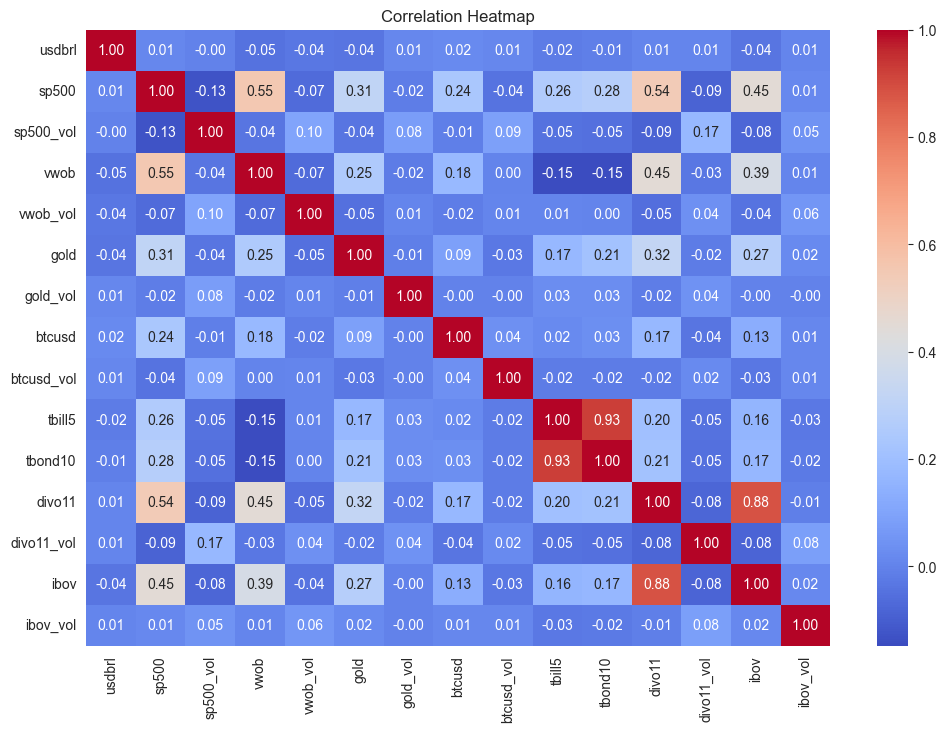

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_log = data.dropna()
data_log = np.log(data_log).diff()

plt.figure(figsize=(12, 8))
sns.heatmap(data_log.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.xticks(rotation=90)
plt.title("Correlation Heatmap")
plt.show()

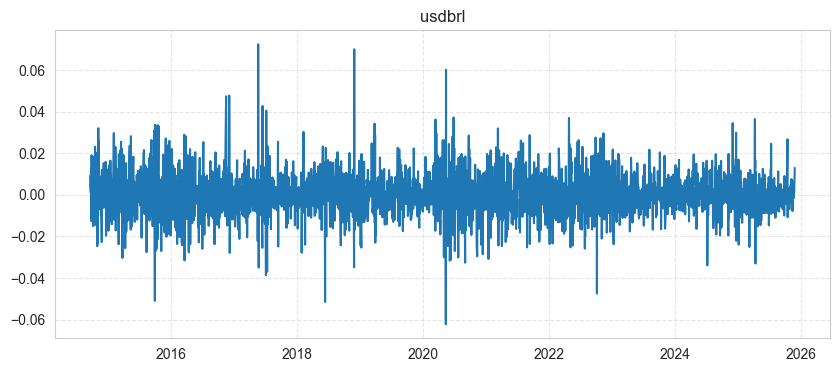

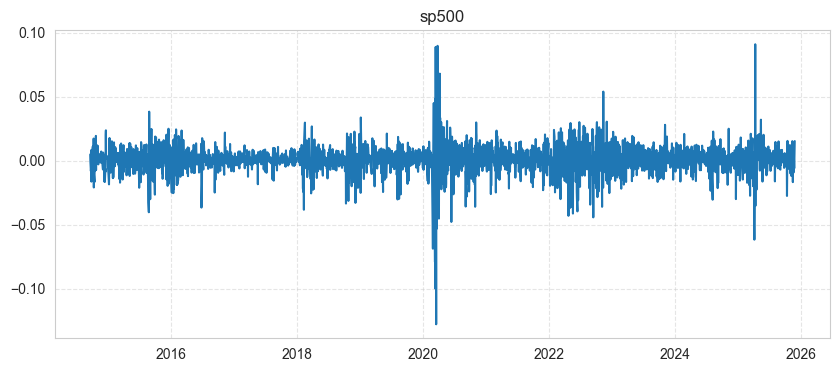

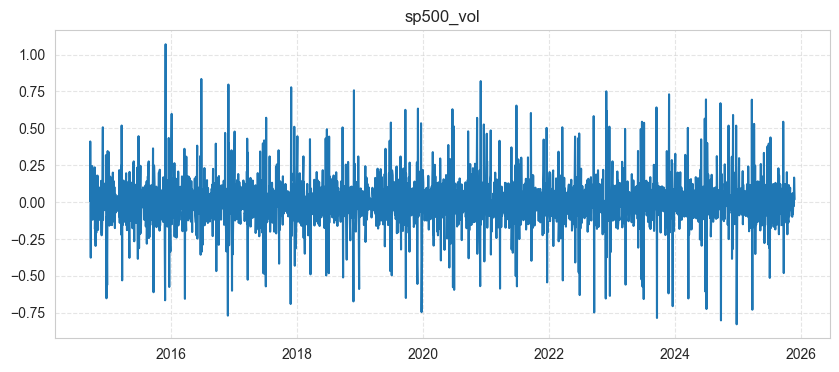

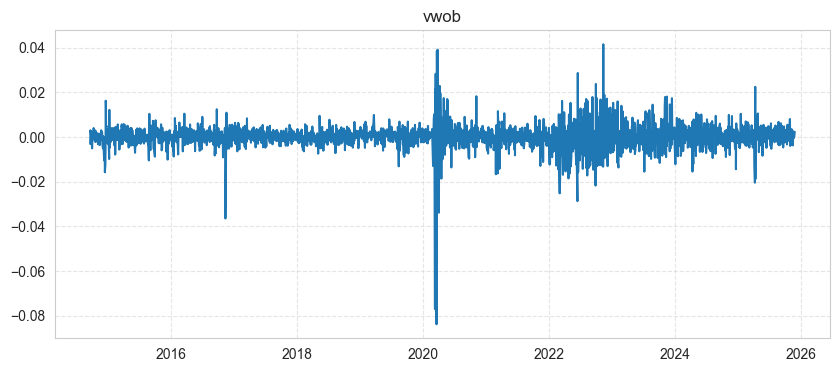

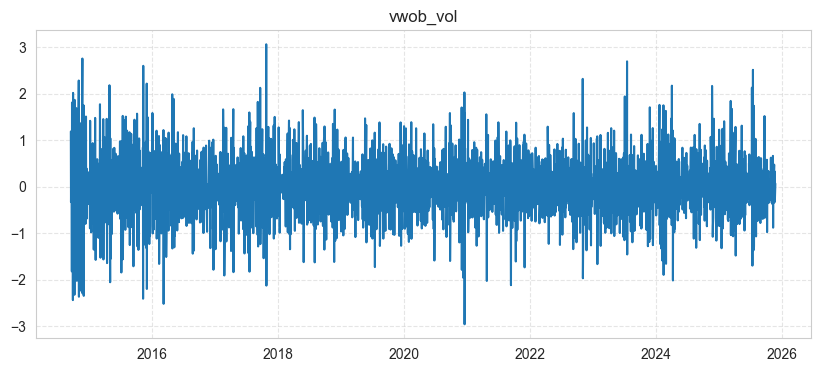

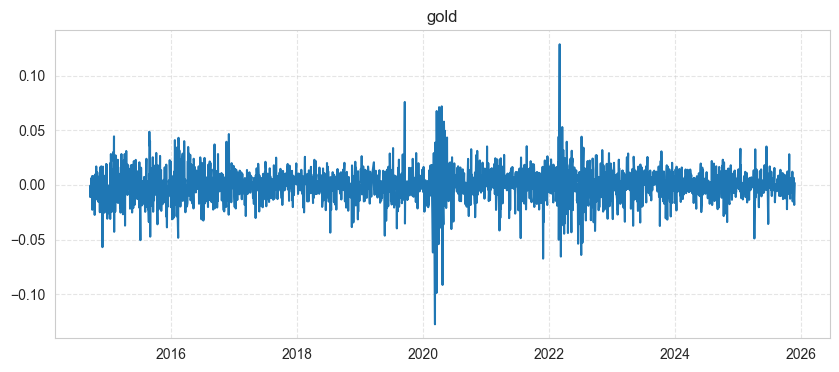

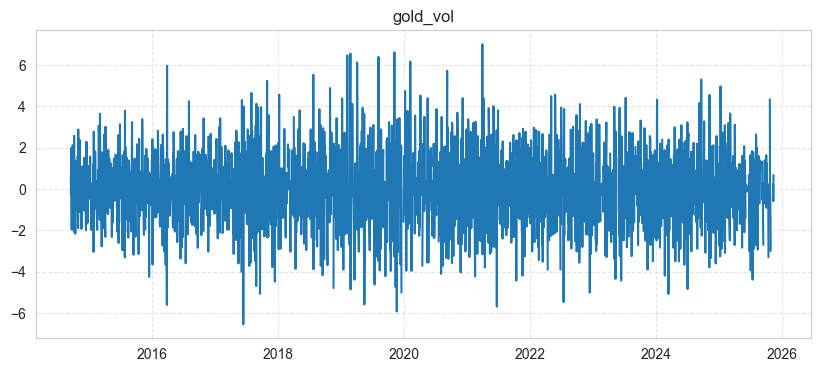

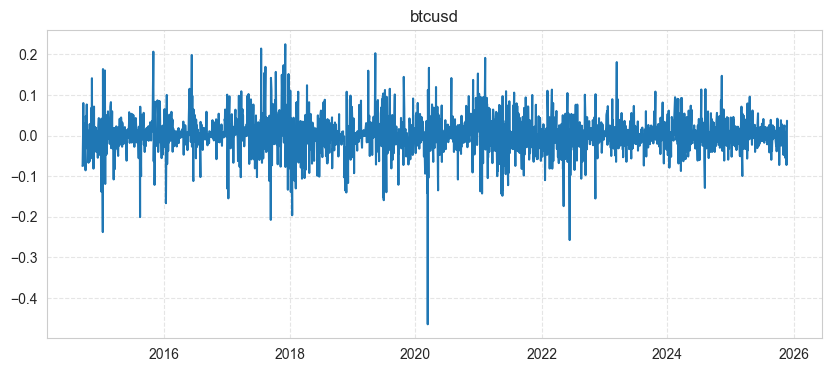

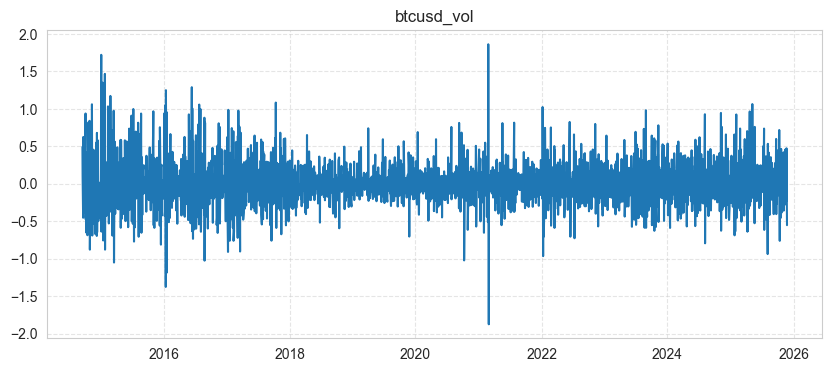

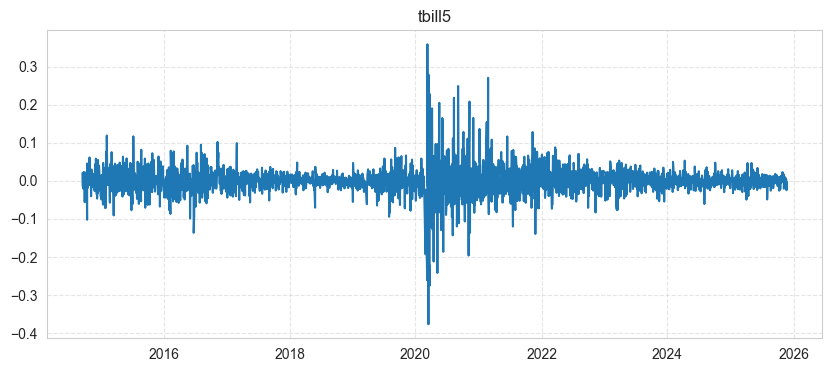

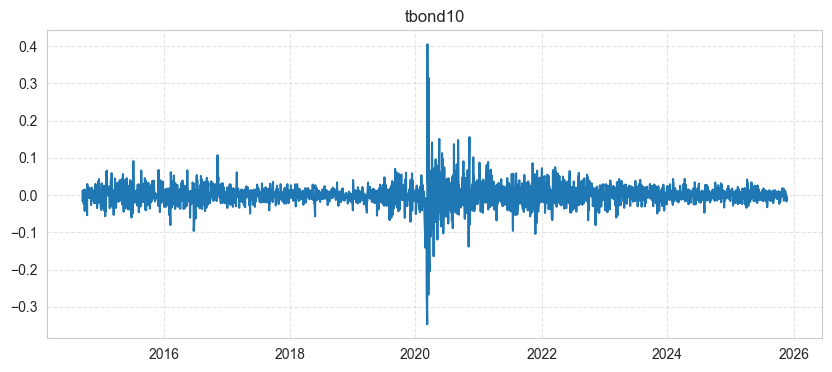

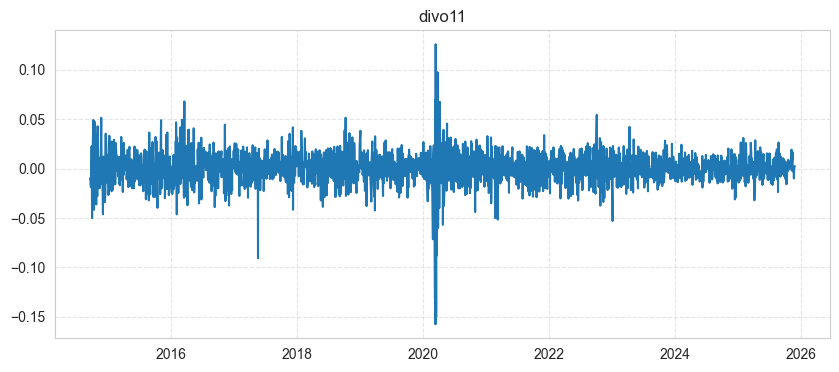

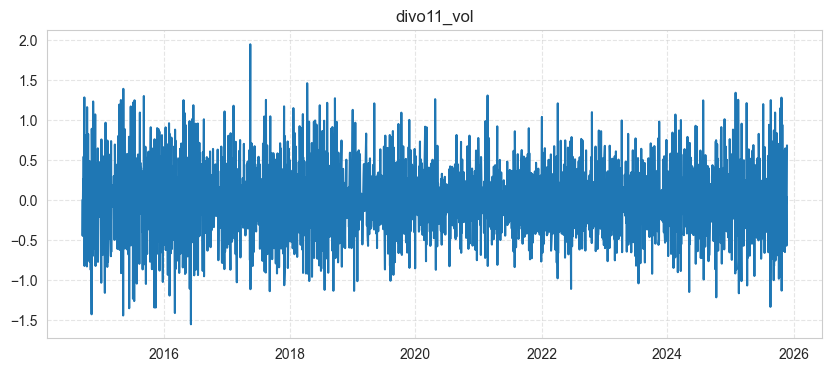

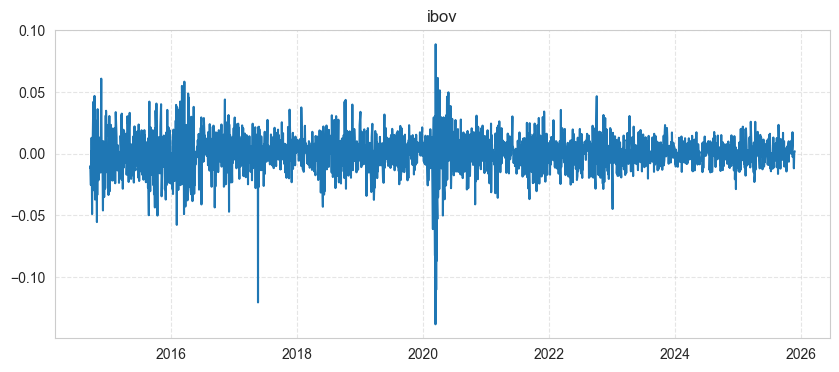

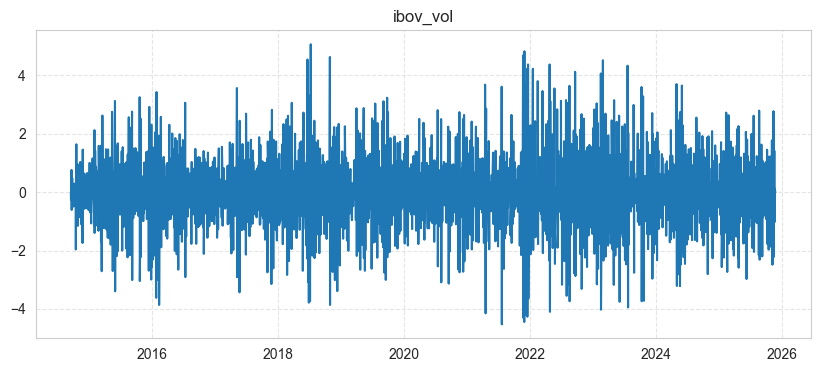

In [43]:
for column in data_log.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(data_log[column], label=column)
    plt.grid(True, alpha=0.5, linestyle='--')
    plt.title(column)
    plt.show()

In [50]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    series = series.replace([np.inf, -np.inf], np.nan).dropna()

    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]:.2f}")



for col in data_log.columns:
    print(f"--- {col} ---")
    adf_test(data_log[col])
    print()

--- usdbrl ---
ADF Statistic: -57.8349422017189
p-value: 0.00

--- sp500 ---
ADF Statistic: -16.79085866744184
p-value: 0.00

--- sp500_vol ---
ADF Statistic: -16.611213240721817
p-value: 0.00

--- vwob ---
ADF Statistic: -12.22995711357808
p-value: 0.00

--- vwob_vol ---
ADF Statistic: -16.3524844007824
p-value: 0.00

--- gold ---
ADF Statistic: -35.31738961973724
p-value: 0.00

--- gold_vol ---
ADF Statistic: -9.924722204149449
p-value: 0.00

--- btcusd ---
ADF Statistic: -28.352211153652092
p-value: 0.00

--- btcusd_vol ---
ADF Statistic: -14.647226039053438
p-value: 0.00

--- tbill5 ---
ADF Statistic: -8.496432519939416
p-value: 0.00

--- tbond10 ---
ADF Statistic: -8.53199700771366
p-value: 0.00

--- divo11 ---
ADF Statistic: -15.134092921050556
p-value: 0.00

--- divo11_vol ---
ADF Statistic: -15.447969358651124
p-value: 0.00

--- ibov ---
ADF Statistic: -15.333076344409527
p-value: 0.00

--- ibov_vol ---
ADF Statistic: -18.4251196949957
p-value: 0.00

